In [1]:
import os
import pandas as pd

# Path to the directory containing your text files
directory_path_A = '/Set_A'
directory_path_B = '/Set_B'
directory_path_C = '/Set_C'
directory_path_D = '/Set_D'
directory_path_E = '/Set_E'

# List all files in the directory
all_files_A = [os.path.join(directory_path_A, file) for file in os.listdir(directory_path_A) if file.endswith('.txt')]
all_files_B = [os.path.join(directory_path_B, file) for file in os.listdir(directory_path_B) if file.endswith('.txt')]
all_files_C = [os.path.join(directory_path_C, file) for file in os.listdir(directory_path_C) if file.endswith('.TXT')]
all_files_D = [os.path.join(directory_path_D, file) for file in os.listdir(directory_path_D) if file.endswith('.txt')]
all_files_E = [os.path.join(directory_path_E, file) for file in os.listdir(directory_path_E) if file.endswith('.txt')]

In [2]:
def load_eeg_file(file_path):
    """Load EEG data from a text file."""
    data = pd.read_csv(file_path, header=None, delimiter=' ')
    return data

In [3]:
def load_files(file_list):
    data_frames = []
    for file in file_list:
        try:
            # Read the file into a DataFrame
            # Adjust the 'delimiter' and 'header' parameters according to your file format
            df = pd.read_csv(file, delimiter=' ', header=None)
            data_frames.append(df)
        except Exception as e:
            print(f"Error loading file {file}: {e}")
    return data_frames

# Load all files from each set
data_A = load_files(all_files_A)
data_B = load_files(all_files_B)
data_C = load_files(all_files_C)
data_D = load_files(all_files_D)
data_E = load_files(all_files_E)

In [4]:
import numpy as np

# Convert each element in data sets to a numpy array
arr_A = [np.array(segment) for segment in data_A]
arr_B = [np.array(segment) for segment in data_B]
arr_C = [np.array(segment) for segment in data_C]
arr_D = [np.array(segment) for segment in data_D]
arr_E = [np.array(segment) for segment in data_E]

# Flatten each array to make sure it's 1D
eeg_A = np.array([arr.flatten() for arr in arr_A])
eeg_B = np.array([arr.flatten() for arr in arr_B])
eeg_C = np.array([arr.flatten() for arr in arr_C])
eeg_D = np.array([arr.flatten() for arr in arr_D])
eeg_E = np.array([arr.flatten() for arr in arr_E])

In [5]:
import numpy as np
from scipy.signal import butter, filtfilt

# Define filter parameters
hp_cutoff = 0.53  # High-pass filter cutoff frequency (in Hz)
lp_cutoff = 40   # Low-pass filter cutoff frequency (in Hz)
fs = 173.61      # Sampling frequency of your EEG data (in Hz)

# Butterworth filter design
b_hp, a_hp = butter(N=4, Wn=hp_cutoff, btype='high', fs=fs)
b_lp, a_lp = butter(N=4, Wn=lp_cutoff, btype='low', fs=fs)


# Apply high-pass filter
eeg_A_hp = np.apply_along_axis(lambda x: filtfilt(b_hp, a_hp, x), axis=1, arr=eeg_A)
eeg_B_hp = np.apply_along_axis(lambda x: filtfilt(b_hp, a_hp, x), axis=1, arr=eeg_B)
eeg_C_hp = np.apply_along_axis(lambda x: filtfilt(b_hp, a_hp, x), axis=1, arr=eeg_C)
eeg_D_hp = np.apply_along_axis(lambda x: filtfilt(b_hp, a_hp, x), axis=1, arr=eeg_D)
eeg_E_hp = np.apply_along_axis(lambda x: filtfilt(b_hp, a_hp, x), axis=1, arr=eeg_E)
# Apply low-pass filter
eeg_A = np.apply_along_axis(lambda x: filtfilt(b_lp, a_lp, x), axis=1, arr=eeg_A_hp)
eeg_B = np.apply_along_axis(lambda x: filtfilt(b_lp, a_lp, x), axis=1, arr=eeg_B_hp)
eeg_C = np.apply_along_axis(lambda x: filtfilt(b_lp, a_lp, x), axis=1, arr=eeg_C_hp)
eeg_D = np.apply_along_axis(lambda x: filtfilt(b_lp, a_lp, x), axis=1, arr=eeg_D_hp)
eeg_E = np.apply_along_axis(lambda x: filtfilt(b_lp, a_lp, x), axis=1, arr=eeg_E_hp)




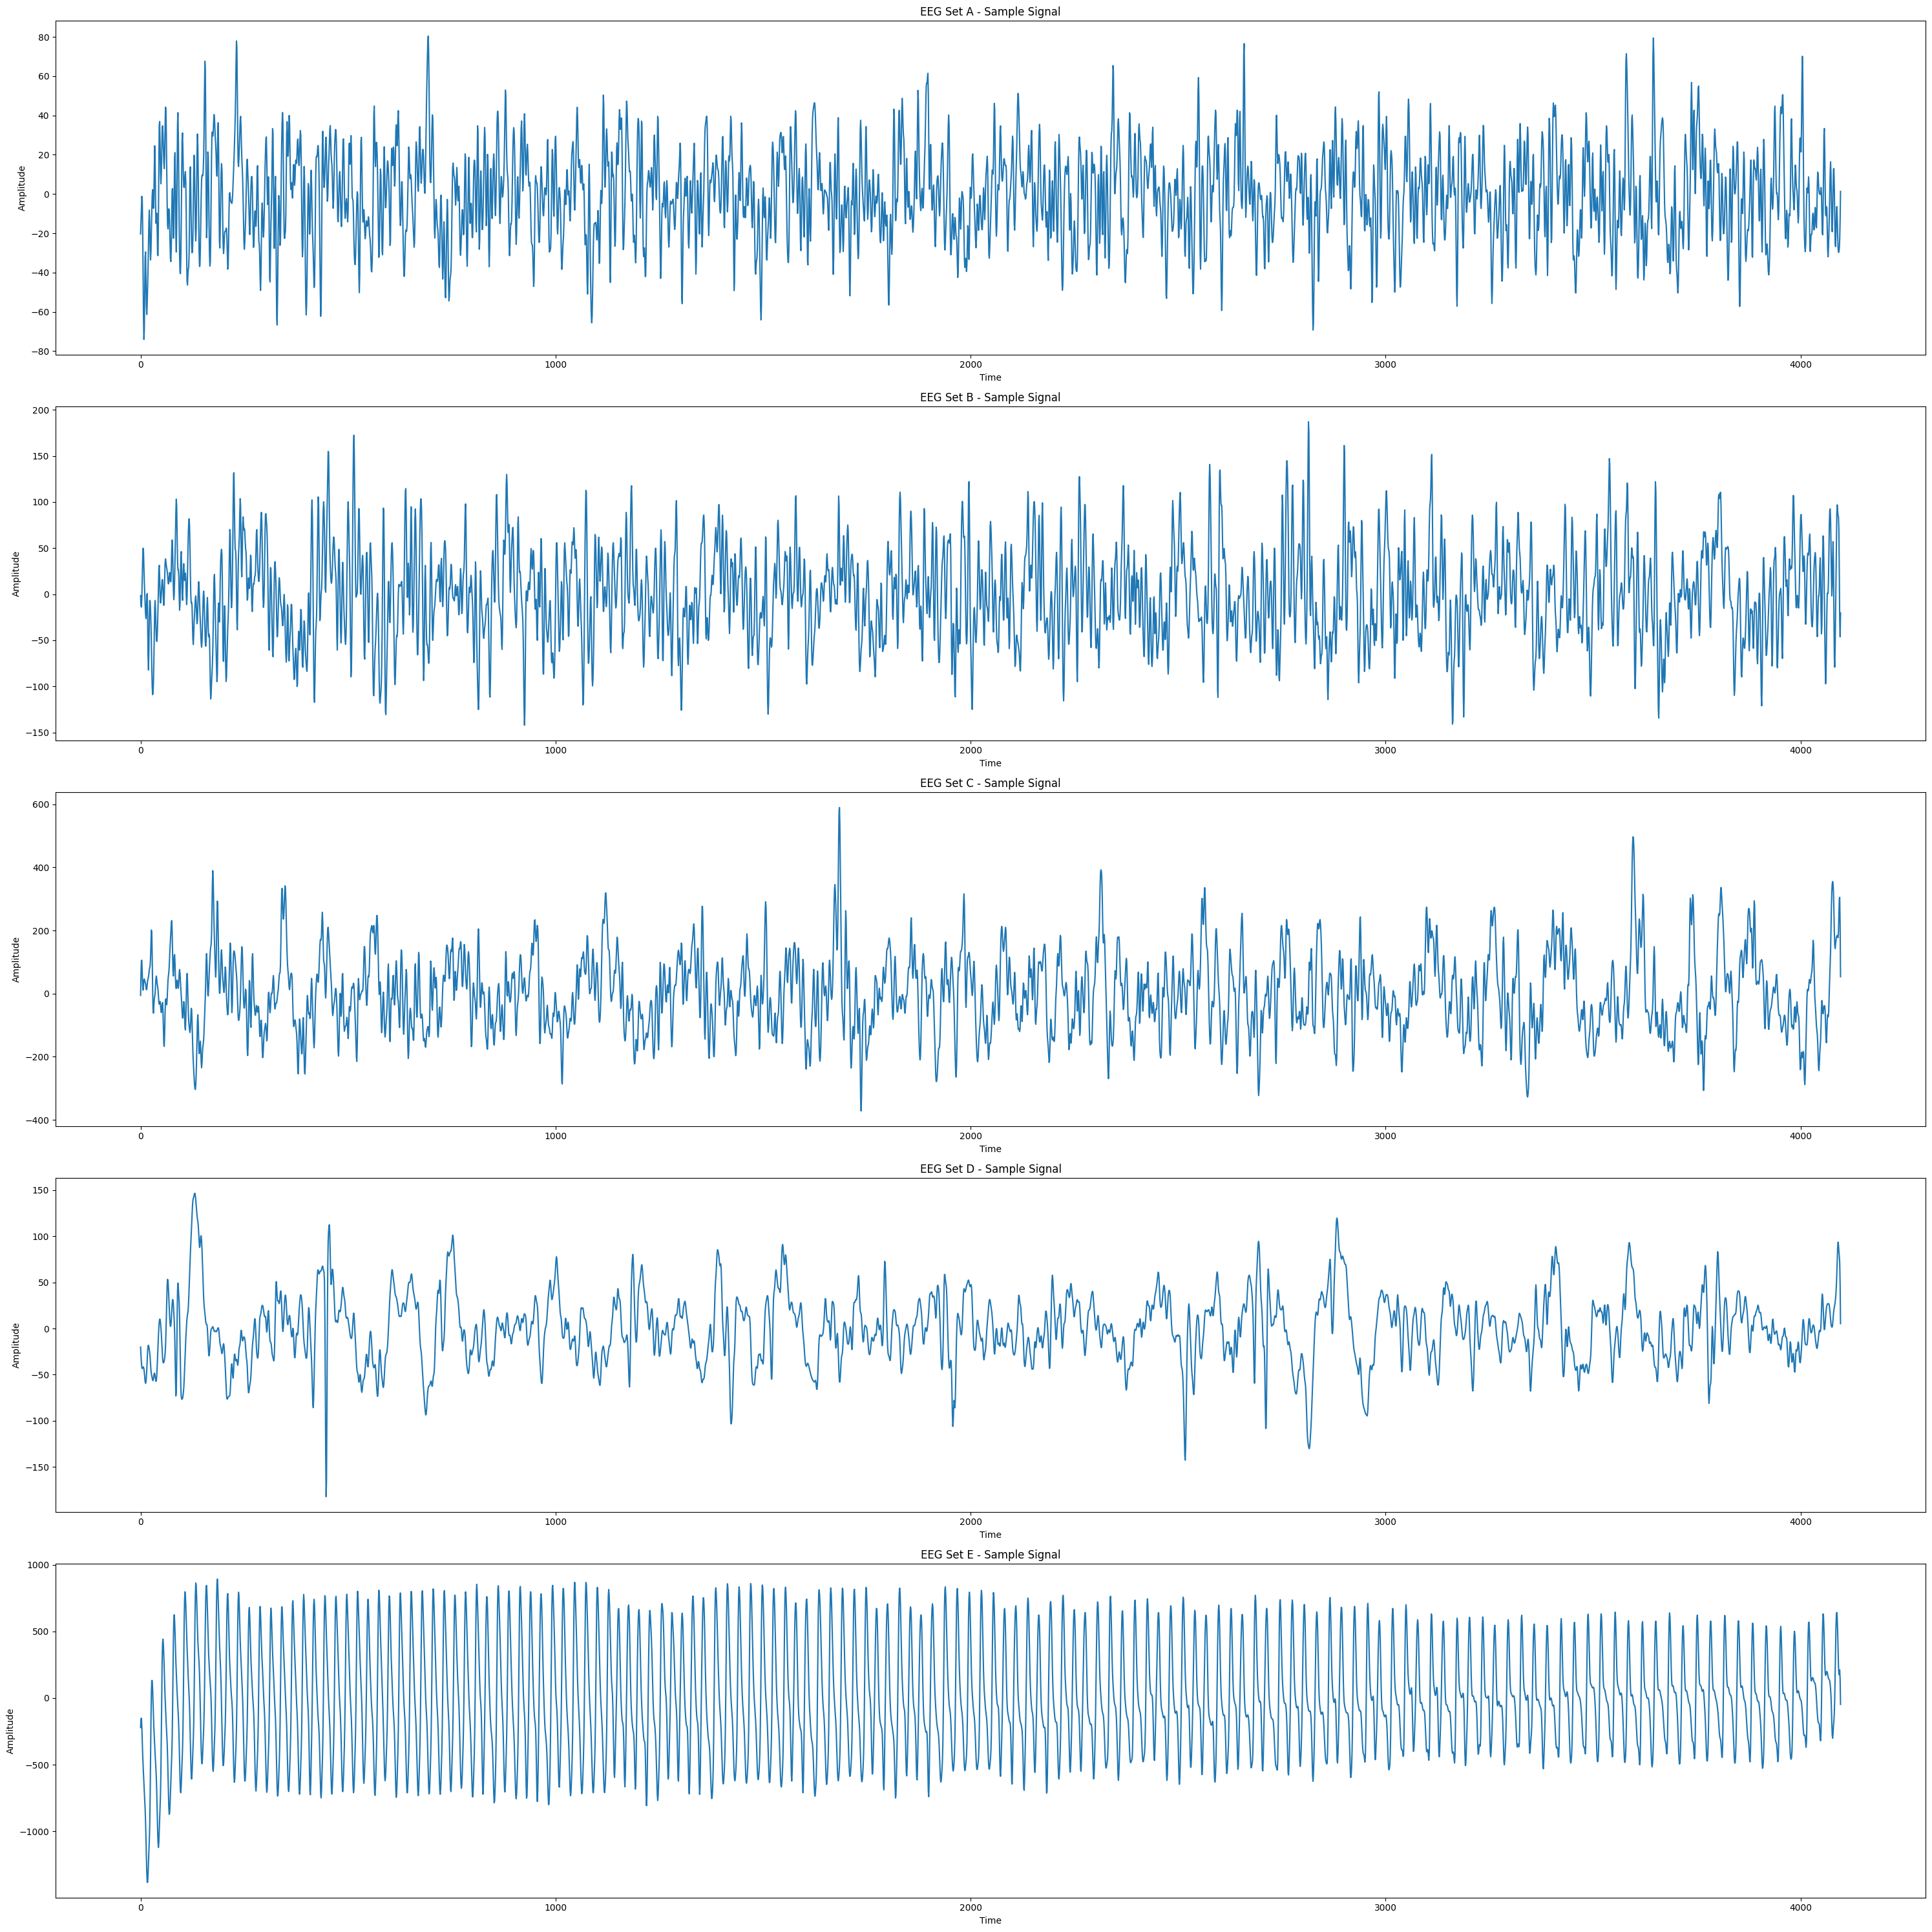

In [6]:
import matplotlib.pyplot as plt

# Create a figure with 5 subplots (arranged vertically)
plt.figure(figsize=(30, 30))

# Subplot for EEG Set A
plt.subplot(5, 1, 1)  # 5 rows, 1 column, 1st subplot
plt.plot(eeg_A[0])  # Plot the first channel of the first DataFrame in eeg_A
plt.title('EEG Set A - Sample Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Subplot for EEG Set B
plt.subplot(5, 1, 2)
plt.plot(eeg_B[0])
plt.title('EEG Set B - Sample Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Subplot for EEG Set C
plt.subplot(5, 1, 3)
plt.plot(eeg_C[0])
plt.title('EEG Set C - Sample Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Subplot for EEG Set D
plt.subplot(5, 1, 4)
plt.plot(eeg_D[0])
plt.title('EEG Set D - Sample Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Subplot for EEG Set E
plt.subplot(5, 1, 5)
plt.plot(eeg_E[0])
plt.title('EEG Set E - Sample Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Display the plots
plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(eeg_E[0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Typically, if p-value < 0.05, the series is stationary


ADF Statistic: -11.486664
p-value: 0.000000


**Feature Extraction**

In [8]:
import numpy as np
import scipy.stats
from scipy.fftpack import fft
from scipy.signal import welch

#Time_Domain_Features

def extract_time_domain_features(segment):
    mean = np.mean(segment)
    std_dev = np.std(segment)
    skewness = scipy.stats.skew(segment)
    kurtosis = scipy.stats.kurtosis(segment)
    peak_to_peak_amplitude = np.ptp(segment)
    return mean, std_dev, skewness, kurtosis, peak_to_peak_amplitude

#Calculate_Hjorth_Parameters
    
def calculate_activity(segment):
    activity = np.var(segment)
    
    return activity
    
def calculate_mobility(segment):
    first_derivative = np.diff(segment)
    mobility = np.sqrt(np.var(first_derivative))
    
    return mobility

def calculate_complexity(segment):
    first_derivative = np.diff(segment)
    second_derivative = np.diff(first_derivative)

    mobility_signal = calculate_mobility(segment)
    mobility_derivative = np.sqrt(np.var(second_derivative))

    complexity = mobility_derivative / mobility_signal if mobility_signal != 0 else 0
    
    return complexity

#Calculate_Zero_Crossing_Rate

def calculate_zero_crossing_rate(segment):
    zero_crossings = np.where(np.diff(np.sign(segment)))[0]
    zero_crossing_rate = len(zero_crossings) / len(segment)
    
    return zero_crossing_rate

#Frequency_Domain_Features

def extract_frequency_domain_features(segment, fs):
    # Compute the Power Spectral Density (PSD) using Welch's method
    freqs, psd = welch(segment, fs)

    # Calculate band power in the alpha frequency band (8-13 Hz)
    alpha_band = (freqs >= 8) & (freqs <= 13)
    band_power_alpha  = np.sum(psd[alpha_band])
    
    return band_power_alpha 

def calculate_peak_frequency(segment, fs):
    f, Pxx = welch(segment, fs=fs)
    peak_freq = f[np.argmax(Pxx)]
    return peak_freq

def calculate_spectral_edge_frequency(segment, fs, percentile=95):
    f, Pxx = welch(segment, fs=fs)
    cumulative_power = np.cumsum(Pxx)
    total_power = cumulative_power[-1]
    edge_freq = f[np.where(cumulative_power >= total_power * (percentile / 100.0))[0][0]]
    return edge_freq

def calculate_spectral_entropy(segment, fs):
    f, Pxx = welch(segment, fs=fs)
    normalized_spectrum = Pxx / sum(Pxx)
    spectral_entropy = -sum(normalized_spectrum * np.log2(normalized_spectrum + np.finfo(float).eps))
    return spectral_entropy

def calculate_median_frequency(segment, fs):
    f, Pxx = welch(segment, fs=fs)
    cumulative_power = np.cumsum(Pxx)
    total_power = cumulative_power[-1]
    median_freq = f[np.where(cumulative_power >= total_power / 2)[0][0]]
    return median_freq



In [9]:
import pandas as pd

# Initialize a list to store feature dictionaries
features_list = []

for segment in eeg_A:
    # Extract time-domain features
    mean, std_dev, skewness, kurt, peak_to_peak_amplitude = extract_time_domain_features(segment)

    #Extract Hjorth Parameters
    activity = calculate_activity(segment)
    mobility = calculate_mobility(segment)
    complexity = calculate_complexity(segment)

    #Extract Zero Crossing Rate
    zero_crossing_rate = calculate_zero_crossing_rate(segment)
    
    # Extract frequency-domain features (assuming a fixed sampling rate 'fs')
    fs = 173.61 
    band_power_alpha = extract_frequency_domain_features(segment, fs)
    peak_freq = calculate_peak_frequency(segment, fs)
    edge_freq = calculate_spectral_edge_frequency(segment, fs, percentile=95)
    spectral_entropy = calculate_spectral_entropy(segment, fs)
    median_freq = calculate_median_frequency(segment, fs)
    
    # Create a dictionary of features
    features_dict = {
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurt,
        'peak_to_peak_amplitude': peak_to_peak_amplitude,
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'zero_crossing_rate': zero_crossing_rate,
        'band_power_alpha': band_power_alpha,
        'peak_freq': peak_freq,
        'edge_freq': edge_freq,
        'spectral_entropy': spectral_entropy,
        'median_freq': median_freq
    }
    
    # Append the dictionary to the features_list
    features_list.append(features_dict)

# Convert the list of dictionaries to a DataFrame
feature_extraction_A = pd.DataFrame(features_list)
feature_extraction_A

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,-0.243056,22.217468,0.053325,0.092955,154.451517,493.615862,9.966839,0.747473,0.146205,154.472087,2.034492,24.413906,5.224276,8.137969
1,0.191531,45.321806,-0.016549,0.278221,353.393342,2054.066136,20.577148,0.727638,0.145228,975.286066,11.528789,25.092070,5.223360,10.172461
2,-0.004825,37.071318,0.130947,0.290301,276.304025,1374.282617,10.942847,0.636496,0.100317,328.922016,0.678164,18.988594,4.350380,2.712656
3,-0.046893,36.931402,-0.091260,0.329105,290.832382,1363.928448,11.039321,0.660106,0.100073,253.777441,0.678164,19.666758,4.531919,4.747148
4,-0.016148,41.561800,-0.047561,0.374671,313.408355,1727.383186,15.330321,0.636416,0.118135,918.240866,0.678164,20.344922,4.661380,7.459805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.209187,40.268160,0.177854,0.342996,287.994208,1621.524673,16.920244,0.762729,0.139126,524.738228,1.356328,25.092070,5.012928,6.781641
96,0.288999,30.492973,0.038104,0.364155,251.487319,929.821411,12.249393,0.668209,0.130827,436.728353,1.356328,23.057578,4.929889,8.816133
97,-0.051731,28.924440,0.034237,0.128543,218.429458,836.623238,8.816557,0.693786,0.093971,157.460275,1.356328,19.666758,4.480810,3.390820
98,0.334484,45.403504,-0.023962,-0.020706,313.614442,2061.478211,13.761289,0.579128,0.101050,805.213958,0.678164,16.275938,4.232474,2.712656


In [10]:
import pandas as pd

# Initialize a list to store feature dictionaries
features_list = []

for segment in eeg_B:
    # Extract time-domain features
    mean, std_dev, skewness, kurt, peak_to_peak_amplitude = extract_time_domain_features(segment)

    #Extract Hjorth Parameters
    activity = calculate_activity(segment)
    mobility = calculate_mobility(segment)
    complexity = calculate_complexity(segment)

    #Extract Zero Crossing Rate
    zero_crossing_rate = calculate_zero_crossing_rate(segment)
    
    # Extract frequency-domain features (assuming a fixed sampling rate 'fs')
    fs = 173.61  # replace with the actual sampling rate
    band_power_alpha = extract_frequency_domain_features(segment, fs)
    peak_freq = calculate_peak_frequency(segment, fs)
    edge_freq = calculate_spectral_edge_frequency(segment, fs, percentile=95)
    spectral_entropy = calculate_spectral_entropy(segment, fs)
    median_freq = calculate_median_frequency(segment, fs)
    
    # Create a dictionary of features
    features_dict = {
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurt,
        'peak_to_peak_amplitude': peak_to_peak_amplitude,
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'zero_crossing_rate': zero_crossing_rate,
        'band_power_alpha': band_power_alpha,
        'peak_freq': peak_freq,
        'edge_freq': edge_freq,
        'spectral_entropy': spectral_entropy,
        'median_freq': median_freq
    }
    
    
    # Append the dictionary to the features_list
    features_list.append(features_dict)

# Convert the list of dictionaries to a DataFrame
feature_extraction_B = pd.DataFrame(features_list)

In [11]:
feature_extraction_B

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,0.182610,48.398308,0.181668,0.060794,329.111250,2342.396196,19.920049,0.684072,0.129851,723.010844,0.678164,22.379414,5.008506,7.459805
1,-0.308955,28.936402,-0.009817,0.076227,215.132300,837.315351,11.644427,0.619989,0.130339,543.631499,10.172461,21.023086,4.851489,9.494297
2,-0.166371,75.066545,0.283896,0.329242,525.159611,5634.986243,27.953447,0.458002,0.121308,6862.502532,10.172461,14.919609,3.576500,10.172461
3,0.959993,60.894889,-0.024409,-0.099202,414.852238,3708.187486,25.157371,0.603436,0.131072,2959.197156,11.528789,21.701250,4.603772,10.850625
4,-0.244515,58.997520,-0.137492,0.078458,416.163642,3480.707378,25.363967,0.576339,0.139858,1619.851230,13.563281,18.988594,4.815686,12.206953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.191311,43.395366,-0.145490,0.319595,325.150960,1883.157832,14.388910,0.553085,0.109104,1193.165426,9.494297,18.310430,4.523593,8.137969
96,-0.018402,103.819050,0.081253,-0.360746,660.650056,10778.395167,41.536260,0.485554,0.129607,12484.830499,11.528789,15.597773,3.641393,10.850625
97,-0.243767,53.654320,0.271306,0.755143,439.994157,2878.786072,19.328355,0.525001,0.113498,2280.656872,9.494297,18.310430,4.475247,8.816133
98,-0.833310,60.160987,0.128460,0.505158,519.763422,3619.344398,25.852704,0.607601,0.141811,1681.389643,13.563281,19.666758,4.974689,11.528789


In [12]:
import pandas as pd

# Initialize a list to store feature dictionaries
features_list = []

for segment in eeg_C:
    # Extract time-domain features
    mean, std_dev, skewness, kurt, peak_to_peak_amplitude = extract_time_domain_features(segment)

    #Extract Hjorth Parameters
    activity = calculate_activity(segment)
    mobility = calculate_mobility(segment)
    complexity = calculate_complexity(segment)

    #Extract Zero Crossing Rate
    zero_crossing_rate = calculate_zero_crossing_rate(segment)
    
    # Extract frequency-domain features (assuming a fixed sampling rate 'fs')
    fs = 173.61  # replace with the actual sampling rate
    band_power_alpha = extract_frequency_domain_features(segment, fs)
    peak_freq = calculate_peak_frequency(segment, fs)
    edge_freq = calculate_spectral_edge_frequency(segment, fs, percentile=95)
    spectral_entropy = calculate_spectral_entropy(segment, fs)
    median_freq = calculate_median_frequency(segment, fs)
    
    # Create a dictionary of features
    features_dict = {
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurt,
        'peak_to_peak_amplitude': peak_to_peak_amplitude,
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'zero_crossing_rate': zero_crossing_rate,
        'band_power_alpha': band_power_alpha,
        'peak_freq': peak_freq,
        'edge_freq': edge_freq,
        'spectral_entropy': spectral_entropy,
        'median_freq': median_freq
    }
    
    # Append the dictionary to the features_list
    features_list.append(features_dict)

# Convert the list of dictionaries to a DataFrame
feature_extraction_C = pd.DataFrame(features_list)

In [13]:
feature_extraction_C

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,0.537617,120.722885,0.413192,0.516292,961.488255,14574.015057,35.251481,0.660021,0.090066,2364.318106,1.356328,17.632266,4.384809,2.712656
1,-0.335522,22.024031,-0.508084,1.609721,182.112536,485.057957,4.286777,0.585954,0.069319,41.625665,1.356328,11.528789,3.770327,2.034492
2,0.164363,57.392562,-0.088753,0.248604,388.329382,3293.906199,12.932228,0.599950,0.075177,440.529049,1.356328,14.241445,3.982424,2.712656
3,-0.159862,40.976977,-0.074203,0.157001,305.562102,1679.112620,8.202861,0.620801,0.060532,192.042099,1.356328,12.206953,3.651962,2.034492
4,0.240546,34.761816,-0.270525,0.953373,261.000182,1208.383837,7.019827,0.545160,0.071516,141.252613,1.356328,12.206953,3.843603,2.712656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.145353,51.320006,-0.487934,0.786523,366.329510,2633.743048,8.941482,0.521139,0.050525,249.711844,1.356328,10.172461,3.649752,2.034492
96,0.320208,40.537510,-0.311860,0.431346,311.935446,1643.289743,7.604569,0.482072,0.060776,163.052767,1.356328,8.816133,3.795277,2.712656
97,-0.099304,64.379854,-0.192203,0.639224,471.581480,4144.765557,8.437162,0.486115,0.040762,206.781135,1.356328,7.459805,3.011095,1.356328
98,0.235784,33.432586,-0.208150,0.474929,250.789413,1117.737805,6.908734,0.503750,0.069563,167.194231,1.356328,9.494297,3.895006,2.712656


In [14]:
import pandas as pd

# Initialize a list to store feature dictionaries
features_list = []

for segment in eeg_D:
    # Extract time-domain features
    mean, std_dev, skewness, kurt, peak_to_peak_amplitude = extract_time_domain_features(segment)

    #Extract Hjorth Parameters
    activity = calculate_activity(segment)
    mobility = calculate_mobility(segment)
    complexity = calculate_complexity(segment)

    #Extract Zero Crossing Rate
    zero_crossing_rate = calculate_zero_crossing_rate(segment)
    
    # Extract frequency-domain features (assuming a fixed sampling rate 'fs')
    fs = 173.61  # replace with the actual sampling rate
    band_power_alpha = extract_frequency_domain_features(segment, fs)
    peak_freq = calculate_peak_frequency(segment, fs)
    edge_freq = calculate_spectral_edge_frequency(segment, fs, percentile=95)
    spectral_entropy = calculate_spectral_entropy(segment, fs)
    median_freq = calculate_median_frequency(segment, fs)
    
    # Create a dictionary of features
    features_dict = {
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurt,
        'peak_to_peak_amplitude': peak_to_peak_amplitude,
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'zero_crossing_rate': zero_crossing_rate,
        'band_power_alpha': band_power_alpha,
        'peak_freq': peak_freq,
        'edge_freq': edge_freq,
        'spectral_entropy': spectral_entropy,
        'median_freq': median_freq
    }
    
    # Append the dictionary to the features_list
    features_list.append(features_dict)

# Convert the list of dictionaries to a DataFrame
feature_extraction_D = pd.DataFrame(features_list)

In [15]:
feature_extraction_D

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,-0.001836,36.693868,0.107122,1.069715,328.837777,1346.439961,7.498479,0.538854,0.060288,207.109015,1.356328,11.528789,3.776832,2.034492
1,0.029983,22.819137,-0.150083,-0.171961,141.397253,520.713008,5.185886,0.515692,0.072004,82.568528,5.425313,11.528789,3.845742,4.747148
2,0.561916,94.549414,-0.251324,0.692474,716.551123,8939.591599,18.541069,0.592889,0.055162,993.960367,0.678164,12.885117,3.775804,2.034492
3,0.025579,28.466120,-0.434145,0.414221,194.017444,810.320008,6.060571,0.505335,0.066390,113.117363,1.356328,11.528789,4.045959,3.390820
4,0.245947,293.793177,-0.050469,0.244985,2112.150740,86314.430975,56.548666,0.546835,0.038565,7813.887808,1.356328,11.528789,3.620316,2.034492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.134151,22.890966,-0.441178,0.297287,157.386013,523.996335,4.317144,0.519346,0.056139,44.377253,2.034492,9.494297,3.668464,2.712656
96,-0.482847,28.766917,-0.203360,0.861360,236.928101,827.535535,5.460062,0.654478,0.061020,63.532039,0.678164,12.206953,3.668586,2.034492
97,-0.226329,43.612146,0.076981,0.347327,319.994665,1902.019302,11.976648,0.568025,0.086649,792.822336,1.356328,14.919609,4.265253,3.390820
98,-0.360016,51.015433,-0.257508,0.177277,367.739506,2602.574449,10.540930,0.498862,0.060532,294.397930,4.747148,10.850625,3.892252,4.068984


In [16]:
import pandas as pd

# Initialize a list to store feature dictionaries
features_list = []

for segment in eeg_E:
    # Extract time-domain features
    mean, std_dev, skewness, kurt, peak_to_peak_amplitude = extract_time_domain_features(segment)

    #Extract Hjorth Parameters
    activity = calculate_activity(segment)
    mobility = calculate_mobility(segment)
    complexity = calculate_complexity(segment)

    #Extract Zero Crossing Rate
    zero_crossing_rate = calculate_zero_crossing_rate(segment)
    
    # Extract frequency-domain features (assuming a fixed sampling rate 'fs')
    fs = 173.61  # replace with the actual sampling rate
    band_power_alpha = extract_frequency_domain_features(segment, fs)
    peak_freq = calculate_peak_frequency(segment, fs)
    edge_freq = calculate_spectral_edge_frequency(segment, fs, percentile=95)
    spectral_entropy = calculate_spectral_entropy(segment, fs)
    median_freq = calculate_median_frequency(segment, fs)
    
    # Create a dictionary of features
    features_dict = {
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurt,
        'peak_to_peak_amplitude': peak_to_peak_amplitude,
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'zero_crossing_rate': zero_crossing_rate,
        'band_power_alpha': band_power_alpha,
        'peak_freq': peak_freq,
        'edge_freq': edge_freq,
        'spectral_entropy': spectral_entropy,
        'median_freq': median_freq
    }
    # Append the dictionary to the features_list
    features_list.append(features_dict)

# Convert the list of dictionaries to a DataFrame
feature_extraction_E = pd.DataFrame(features_list)

In [17]:
feature_extraction_E

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,-5.147034,411.054231,0.186194,-0.673429,2276.641723,168965.581130,116.093820,0.410987,0.071760,36166.363827,6.781641,12.885117,3.128732,6.781641
1,0.685477,194.027639,0.452253,-0.169702,957.707555,37646.724801,68.734636,0.580899,0.094215,12362.681422,6.103477,18.988594,3.883799,6.781641
2,0.090061,376.577136,1.103301,1.490456,2428.138609,141810.339312,154.243089,0.648800,0.109348,46555.708743,4.747148,21.701250,4.940946,7.459805
3,2.872071,524.131517,-0.449233,-0.276312,3072.998174,274713.846934,244.600486,0.594403,0.144008,42504.962847,14.241445,18.988594,4.609089,14.241445
4,-1.103733,123.792699,1.100643,0.822501,677.329465,15324.632294,34.169490,0.600316,0.062241,2912.194493,2.712656,16.954102,4.295879,4.747148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-7.893042,549.801303,-0.758503,0.917869,3825.964922,302281.472824,304.187003,0.659639,0.133024,68142.083973,16.275938,22.379414,4.904798,15.597773
96,-2.634854,169.748904,0.699433,1.882474,1354.272209,28814.690281,44.345434,0.488089,0.056627,8262.455066,1.356328,14.919609,4.406880,4.068984
97,0.881108,106.131154,0.318314,-0.984952,483.386216,11263.821823,31.013833,0.480744,0.080791,2716.033546,6.103477,13.563281,3.499732,6.103477
98,-0.783050,360.774422,1.419096,2.249126,2566.346357,130158.183373,158.122371,0.644815,0.102270,46343.168786,4.747148,21.701250,5.037513,9.494297


In [18]:
#feature_extraction_A['Status']= 1
#feature_extraction_B['Status']= 2
#feature_extraction_C['Status']= 3
#feature_extraction_D['Status']= 4
#feature_extraction_E['Status']= 5

feature_extraction_A['New_Status']= 1
feature_extraction_B['New_Status']= 1
feature_extraction_C['New_Status']= 2
feature_extraction_D['New_Status']= 2
feature_extraction_E['New_Status']= 3


In [19]:
import pandas as pd

# Assuming feature_extraction_A, feature_extraction_B, ... are pandas DataFrames
all_features = pd.concat([feature_extraction_A, 
                          feature_extraction_B, 
                          feature_extraction_C, 
                          feature_extraction_D, 
                          feature_extraction_E], 
                          axis=0, ignore_index=True)

# concatenated_features now contains all the data, stacked row-wise
all_features

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq,New_Status
0,-0.243056,22.217468,0.053325,0.092955,154.451517,493.615862,9.966839,0.747473,0.146205,154.472087,2.034492,24.413906,5.224276,8.137969,1
1,0.191531,45.321806,-0.016549,0.278221,353.393342,2054.066136,20.577148,0.727638,0.145228,975.286066,11.528789,25.092070,5.223360,10.172461,1
2,-0.004825,37.071318,0.130947,0.290301,276.304025,1374.282617,10.942847,0.636496,0.100317,328.922016,0.678164,18.988594,4.350380,2.712656,1
3,-0.046893,36.931402,-0.091260,0.329105,290.832382,1363.928448,11.039321,0.660106,0.100073,253.777441,0.678164,19.666758,4.531919,4.747148,1
4,-0.016148,41.561800,-0.047561,0.374671,313.408355,1727.383186,15.330321,0.636416,0.118135,918.240866,0.678164,20.344922,4.661380,7.459805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-7.893042,549.801303,-0.758503,0.917869,3825.964922,302281.472824,304.187003,0.659639,0.133024,68142.083973,16.275938,22.379414,4.904798,15.597773,3
496,-2.634854,169.748904,0.699433,1.882474,1354.272209,28814.690281,44.345434,0.488089,0.056627,8262.455066,1.356328,14.919609,4.406880,4.068984,3
497,0.881108,106.131154,0.318314,-0.984952,483.386216,11263.821823,31.013833,0.480744,0.080791,2716.033546,6.103477,13.563281,3.499732,6.103477,3
498,-0.783050,360.774422,1.419096,2.249126,2566.346357,130158.183373,158.122371,0.644815,0.102270,46343.168786,4.747148,21.701250,5.037513,9.494297,3


In [20]:
#columns_to_exclude = all_features['Status']
column_to_exclude = all_features['New_Status']

# Drop the column to exclude from the DataFrame
#features_to_standardize = all_features.drop('Status', axis=1)
features_to_standardize = all_features.drop('New_Status', axis=1)
features_to_standardize

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,-0.243056,22.217468,0.053325,0.092955,154.451517,493.615862,9.966839,0.747473,0.146205,154.472087,2.034492,24.413906,5.224276,8.137969
1,0.191531,45.321806,-0.016549,0.278221,353.393342,2054.066136,20.577148,0.727638,0.145228,975.286066,11.528789,25.092070,5.223360,10.172461
2,-0.004825,37.071318,0.130947,0.290301,276.304025,1374.282617,10.942847,0.636496,0.100317,328.922016,0.678164,18.988594,4.350380,2.712656
3,-0.046893,36.931402,-0.091260,0.329105,290.832382,1363.928448,11.039321,0.660106,0.100073,253.777441,0.678164,19.666758,4.531919,4.747148
4,-0.016148,41.561800,-0.047561,0.374671,313.408355,1727.383186,15.330321,0.636416,0.118135,918.240866,0.678164,20.344922,4.661380,7.459805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-7.893042,549.801303,-0.758503,0.917869,3825.964922,302281.472824,304.187003,0.659639,0.133024,68142.083973,16.275938,22.379414,4.904798,15.597773
496,-2.634854,169.748904,0.699433,1.882474,1354.272209,28814.690281,44.345434,0.488089,0.056627,8262.455066,1.356328,14.919609,4.406880,4.068984
497,0.881108,106.131154,0.318314,-0.984952,483.386216,11263.821823,31.013833,0.480744,0.080791,2716.033546,6.103477,13.563281,3.499732,6.103477
498,-0.783050,360.774422,1.419096,2.249126,2566.346357,130158.183373,158.122371,0.644815,0.102270,46343.168786,4.747148,21.701250,5.037513,9.494297


In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform
standardized_features = scaler.fit_transform(features_to_standardize)

# Create a new DataFrame from the standardized data
# and use the original feature names
standardized_features_df = pd.DataFrame(standardized_features, columns=features_to_standardize.columns)
standardized_features_df

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq
0,-0.155592,-0.647703,0.145661,-0.351081,-0.679689,-0.397494,-0.495117,1.959226,1.610355,-0.364409,-0.501068,1.637633,1.746963,0.696774
1,0.153250,-0.462913,0.013648,-0.233152,-0.434086,-0.373443,-0.268963,1.732500,1.581397,-0.324787,1.728732,1.774330,1.745326,1.307623
2,0.013709,-0.528901,0.292311,-0.225463,-0.529256,-0.383921,-0.474314,0.690702,0.249353,-0.355988,-0.819611,0.544055,0.184720,-0.932154
3,-0.016187,-0.530020,-0.127503,-0.200763,-0.511320,-0.384080,-0.472258,0.960584,0.242114,-0.359615,-0.819611,0.680752,0.509251,-0.321306
4,0.005662,-0.492986,-0.044943,-0.171758,-0.483449,-0.378478,-0.380797,0.689791,0.777827,-0.327541,-0.819611,0.817450,0.740686,0.493158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-5.592115,3.571941,-1.388119,0.174008,3.852966,4.254020,5.776056,0.955235,1.219429,2.917476,2.843632,1.227541,1.175840,2.936551
496,-1.855343,0.532262,1.366346,0.788016,0.801546,0.039024,0.237648,-1.005672,-1.046495,0.026978,-0.660339,-0.276128,0.285723,-0.524922
497,0.643304,0.023443,0.646302,-1.037210,-0.273604,-0.231491,-0.046510,-1.089626,-0.329797,-0.240758,0.454561,-0.549523,-1.335966,0.085926
498,-0.539343,2.060094,2.725998,1.021404,2.297908,1.601050,2.662753,0.785790,0.307268,1.865203,0.136018,1.090844,1.413092,1.104006


In [22]:
# Concatenate along the columns
final_features = pd.concat([standardized_features_df, column_to_exclude], axis=1)
final_features

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq,New_Status
0,-0.155592,-0.647703,0.145661,-0.351081,-0.679689,-0.397494,-0.495117,1.959226,1.610355,-0.364409,-0.501068,1.637633,1.746963,0.696774,1
1,0.153250,-0.462913,0.013648,-0.233152,-0.434086,-0.373443,-0.268963,1.732500,1.581397,-0.324787,1.728732,1.774330,1.745326,1.307623,1
2,0.013709,-0.528901,0.292311,-0.225463,-0.529256,-0.383921,-0.474314,0.690702,0.249353,-0.355988,-0.819611,0.544055,0.184720,-0.932154,1
3,-0.016187,-0.530020,-0.127503,-0.200763,-0.511320,-0.384080,-0.472258,0.960584,0.242114,-0.359615,-0.819611,0.680752,0.509251,-0.321306,1
4,0.005662,-0.492986,-0.044943,-0.171758,-0.483449,-0.378478,-0.380797,0.689791,0.777827,-0.327541,-0.819611,0.817450,0.740686,0.493158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-5.592115,3.571941,-1.388119,0.174008,3.852966,4.254020,5.776056,0.955235,1.219429,2.917476,2.843632,1.227541,1.175840,2.936551,3
496,-1.855343,0.532262,1.366346,0.788016,0.801546,0.039024,0.237648,-1.005672,-1.046495,0.026978,-0.660339,-0.276128,0.285723,-0.524922,3
497,0.643304,0.023443,0.646302,-1.037210,-0.273604,-0.231491,-0.046510,-1.089626,-0.329797,-0.240758,0.454561,-0.549523,-1.335966,0.085926,3
498,-0.539343,2.060094,2.725998,1.021404,2.297908,1.601050,2.662753,0.785790,0.307268,1.865203,0.136018,1.090844,1.413092,1.104006,3


In [23]:
shuffled_final_features = final_features.sample(frac=1, random_state=42)
shuffled_final_features

,mean,std_dev,skewness,kurtosis,peak_to_peak_amplitude,activity,mobility,complexity,zero_crossing_rate,band_power_alpha,peak_freq,edge_freq,spectral_entropy,median_freq,New_Status
361,0.021324,-0.665489,-0.077178,0.124630,-0.665680,-0.398941,-0.612156,0.239130,-0.822074,-0.369286,-0.341797,-0.549523,-0.342596,-0.932154,2
73,-0.231966,-0.501781,0.264521,-0.358347,-0.525820,-0.379868,-0.413999,0.019592,0.473773,-0.332733,-0.819611,0.270661,0.722131,0.085926,1
374,0.688504,-0.311736,-0.026975,-0.398100,-0.311506,-0.341528,-0.338779,-1.506380,-0.235685,-0.272165,0.773104,-1.233009,-0.674630,0.493158,2
155,-0.144110,-0.472085,0.024897,-0.205082,-0.444033,-0.375025,-0.316418,0.218262,1.139796,-0.291629,1.728732,1.090844,0.335772,1.511239,1
104,-0.156629,-0.353534,-0.214848,-0.360309,-0.356593,-0.351454,-0.166934,0.003073,1.422131,-0.293673,2.206547,0.544055,1.016535,1.918471,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.883396,-0.303149,0.250297,-0.409302,-0.352366,-0.339385,-0.134263,0.242007,1.168753,-0.205469,1.728732,1.090844,0.560907,1.511239,1
270,0.092328,-0.375006,-0.643484,-0.042746,-0.429633,-0.356225,-0.507967,-0.396800,-1.097170,-0.359368,-0.819611,-1.369707,-1.235432,-1.135771,2
348,-0.070767,-0.065096,5.215532,7.792936,0.299033,-0.265820,-0.382947,-1.831300,-1.466378,-0.324633,-0.660339,-1.369707,-1.312567,-1.135771,2
435,-0.405320,2.624825,-1.192429,-0.558250,2.428992,2.463158,2.486042,0.813803,-0.496302,1.629914,-0.501068,0.817450,0.449070,-0.321306,3


In [24]:
shuffled_final_features.to_csv('new_features.csv', index=False)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate features and labels
X = shuffled_final_features.drop('New_Status', axis=1)
y = shuffled_final_features['New_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

# Reshape data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to numpy arrays (if not already)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [26]:
X_train.shape

(320, 14, 1)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
#y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [28]:
# Double-check the range of original labels
print("Original label range:", np.unique(y_train))

# Adjust labels
y_train = y_train - 1
y_val = y_val - 1
y_test = y_test - 1

# Re-check the adjusted label range
print("Adjusted label range:", np.unique(y_train))

# Convert to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)



Original label range: [1 2 3]
Adjusted label range: [0 1 2]


In [29]:
# Assuming X_train_tensor is your original tensor
X_train_tensor = X_train_tensor.transpose(1, 2)
X_val_tensor = X_val_tensor.transpose(1, 2)
X_test_tensor = X_test_tensor.transpose(1, 2)




In [30]:
print(y_test_tensor.shape)

torch.Size([100])


In [31]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [32]:
class CNN1D(nn.Module):
    def __init__(self, dropout_rate=0.5):  # Set a default value to dropout rate
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=3)
        self.dropout = nn.Dropout(dropout_rate)  # Use the passed argument
        self.fc1 = nn.Linear(320, 100)  # The number 192 might need to be adjusted
        self.fc2 = nn.Linear(100, 5)
    
    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)               
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Remove sigmoid if using CrossEntropyLoss
        return x

model = CNN1D()

In [33]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Use nn.CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [34]:
epochs = 10

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        valid_loss = sum(criterion(model(X_batch), y_batch) for X_batch, y_batch in val_loader)

    print(f"Epoch {epoch}, Validation Loss: {valid_loss / len(val_loader)}")


Epoch 0, Validation Loss: 1.3093210458755493
Epoch 1, Validation Loss: 0.8604272603988647
Epoch 2, Validation Loss: 0.5383174419403076
Epoch 3, Validation Loss: 0.4262918531894684
Epoch 4, Validation Loss: 0.34992074966430664
Epoch 5, Validation Loss: 0.30354881286621094
Epoch 6, Validation Loss: 0.36852043867111206
Epoch 7, Validation Loss: 0.3176076412200928
Epoch 8, Validation Loss: 0.25356554985046387
Epoch 9, Validation Loss: 0.2691211998462677


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Run model on validation set and collect predictions
y_val_pred = []
y_val_true = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_val_pred.extend(predicted.cpu().numpy())
        y_val_true.extend(y_batch.cpu().numpy())

# Calculate metrics
accuracy_val = accuracy_score(y_val_true, y_val_pred)
precision_val = precision_score(y_val_true, y_val_pred, average='macro')
recall_val = recall_score(y_val_true, y_val_pred, average='macro')
f1_val = f1_score(y_val_true, y_val_pred, average='macro')

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_val}")

Validation Accuracy: 0.9
Validation Precision: 0.9105295566502463
Validation Recall: 0.9092320261437908
Validation F1 Score: 0.9062321937321937


In [36]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)

        # Get the predicted classes
        _, predicted = torch.max(outputs, 1)

        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy}%")



Test Accuracy: 95.0%


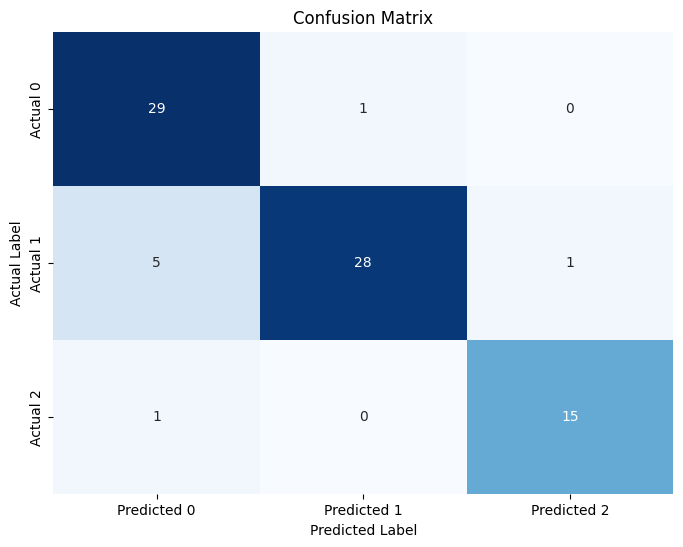

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1','Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1','Actual 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

**Early Stopping Strategy**

In [38]:
epochs = 200
patience = 25  # Set your patience level
best_loss = float('inf')
epochs_without_improvement = 0
best_epoch = -1
val_losses = []
val_accuracies = []
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    train_loss = 0  # Initialize train_loss for each epoch
    correct = 0     # Initialize correct for each epoch
    total = 0       # Initialize total for each epoch
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(y_pred.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_losses.append(train_loss / len(train_loader))  # Record the average train loss per epoch
    train_accuracies.append(100 * correct / total)  # Record the train accuracy per epoch
    
    # Validation
    model.eval()
    valid_loss = 0
    correct = 0  # Reset correct for validation
    total = 0    # Reset total for validation
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            valid_loss += criterion(y_pred, y_batch).item()
            _, predicted = torch.max(y_pred.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    valid_loss /= len(val_loader)
    val_losses.append(valid_loss)  # Record the validation loss per epoch
    val_accuracies.append(100 * correct / total)  # Record the validation accuracy per epoch

    print(f"Epoch {epoch}, Validation Loss: {valid_loss}")

    # Early Stopping Check
    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch = epoch  # Update the best epoch
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered. Stopping at epoch {epoch}")
        break

# After the loop, print best_epoch
print(f"Training stopped after {epoch} epochs due to early stopping.")
print(f"The lowest validation loss was after epoch {best_epoch}")

# Now you can plot using the provided plotting code.


Epoch 0, Validation Loss: 0.22923463582992554
Epoch 1, Validation Loss: 0.23325693607330322
Epoch 2, Validation Loss: 0.23460189998149872
Epoch 3, Validation Loss: 0.20749175548553467
Epoch 4, Validation Loss: 0.21070070564746857
Epoch 5, Validation Loss: 0.20854402333498
Epoch 6, Validation Loss: 0.17723270505666733
Epoch 7, Validation Loss: 0.17099202424287796
Epoch 8, Validation Loss: 0.1792815402150154
Epoch 9, Validation Loss: 0.18102222681045532
Epoch 10, Validation Loss: 0.14280828088521957
Epoch 11, Validation Loss: 0.14806922525167465
Epoch 12, Validation Loss: 0.17114263772964478
Epoch 13, Validation Loss: 0.16286836564540863
Epoch 14, Validation Loss: 0.14122289419174194
Epoch 15, Validation Loss: 0.15075097233057022
Epoch 16, Validation Loss: 0.15282918512821198
Epoch 17, Validation Loss: 0.14266764745116234
Epoch 18, Validation Loss: 0.14139871299266815
Epoch 19, Validation Loss: 0.14385196566581726
Epoch 20, Validation Loss: 0.14087506383657455
Epoch 21, Validation Loss: 

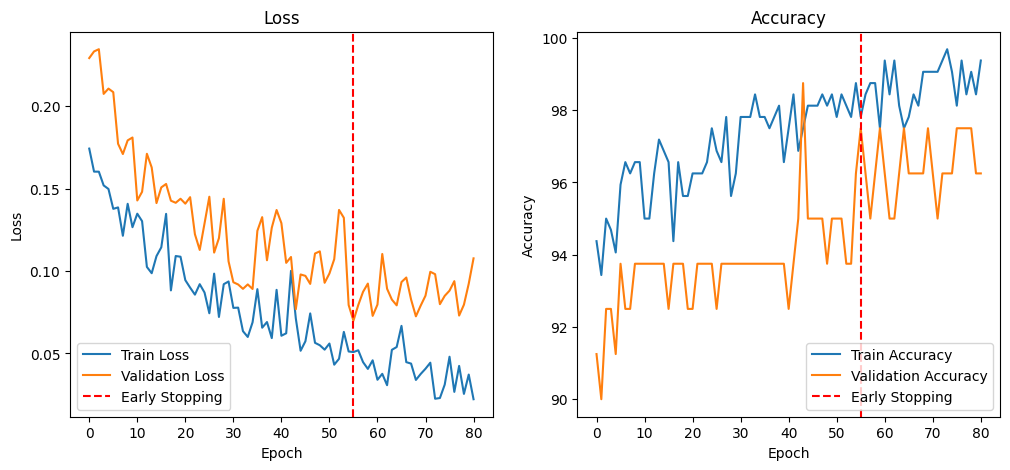

In [39]:
import matplotlib.pyplot as plt

# Plot for loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot for accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [40]:
import matplotlib.pyplot as plt

learning_rates = [0.1, 0.01, 0.001, 0.0001]
accuracies = []

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    model = CNN1D()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    epochs = 55  # Adjust as needed
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        
        # Validation for accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        accuracy = correct / total
        print(f"  Learning Rate: {lr}, Epoch {epoch}, Validation Accuracy: {accuracy}")
    
    accuracies.append(accuracy)

print("Learning rates:", learning_rates)
print("Accuracies:", accuracies)


Training with learning rate: 0.1
  Learning Rate: 0.1, Epoch 0, Validation Accuracy: 0.275
  Learning Rate: 0.1, Epoch 1, Validation Accuracy: 0.775
  Learning Rate: 0.1, Epoch 2, Validation Accuracy: 0.6875
  Learning Rate: 0.1, Epoch 3, Validation Accuracy: 0.725
  Learning Rate: 0.1, Epoch 4, Validation Accuracy: 0.875
  Learning Rate: 0.1, Epoch 5, Validation Accuracy: 0.825
  Learning Rate: 0.1, Epoch 6, Validation Accuracy: 0.8875
  Learning Rate: 0.1, Epoch 7, Validation Accuracy: 0.85
  Learning Rate: 0.1, Epoch 8, Validation Accuracy: 0.875
  Learning Rate: 0.1, Epoch 9, Validation Accuracy: 0.9
  Learning Rate: 0.1, Epoch 10, Validation Accuracy: 0.85
  Learning Rate: 0.1, Epoch 11, Validation Accuracy: 0.8375
  Learning Rate: 0.1, Epoch 12, Validation Accuracy: 0.8875
  Learning Rate: 0.1, Epoch 13, Validation Accuracy: 0.8625
  Learning Rate: 0.1, Epoch 14, Validation Accuracy: 0.85
  Learning Rate: 0.1, Epoch 15, Validation Accuracy: 0.875
  Learning Rate: 0.1, Epoch 16, V

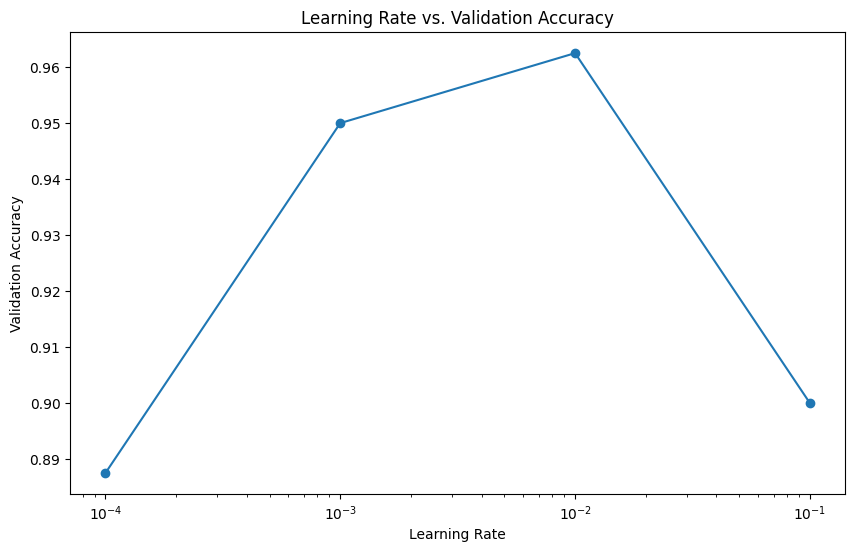

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')  # Since learning rates are typically in a log scale
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Learning Rate vs. Validation Accuracy')
plt.show()


In [46]:
best_learning_rate = 0.01  # insert the best learning rate found previously
best_num_epochs = 55 # insert the best number of epochs found previously
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Example dropout rates

best_dropout_rate = dropout_rates[0]
best_val_loss = float('inf')

for dropout_rate in dropout_rates:
    model = CNN1D(dropout_rate=dropout_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=best_learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Train the model with the current dropout rate
    for epoch in range(best_num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        valid_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                valid_loss += criterion(y_pred, y_batch).item()
        valid_loss /= len(val_loader)

    # If this dropout rate achieved the best validation loss so far, save it
    if valid_loss < best_val_loss:
        best_val_loss = valid_loss
        best_dropout_rate = dropout_rate

print(f"Best dropout rate: {best_dropout_rate}")


Best dropout rate: 0.2


In [44]:
class CNN1D(nn.Module):
    def __init__(self, dropout_rate=0.2):  # Set a default value to dropout rate
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=3)
        self.dropout = nn.Dropout(dropout_rate)  # Use the passed argument
        self.fc1 = nn.Linear(320, 100)  # The number 192 might need to be adjusted
        self.fc2 = nn.Linear(100, 5)
    
    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)               
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Remove sigmoid if using CrossEntropyLoss
        return x

model = CNN1D()

In [45]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Use nn.CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [54]:
epochs = 55
val_losses = []
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    train_loss = 0  # Initialize train_loss for each epoch
    correct = 0     # Initialize correct for each epoch
    total = 0       # Initialize total for each epoch
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(y_pred.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_losses.append(train_loss / len(train_loader))  # Record the average train loss per epoch
    train_accuracies.append(100 * correct / total)  # Record the train accuracy per epoch
    

    # Validation
    model.eval()
    valid_loss = 0
    correct = 0  # Reset correct for validation
    total = 0    # Reset total for validation
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            valid_loss += criterion(y_pred, y_batch).item()
            _, predicted = torch.max(y_pred.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    valid_loss /= len(val_loader)
    val_losses.append(valid_loss)  # Record the validation loss per epoch
    val_accuracies.append(100 * correct / total)  # Record the validation accuracy per epoch

    print(f"Epoch {epoch}, Validation Loss: {valid_loss / len(val_loader)}")


Epoch 0, Validation Loss: 0.050132494419813156
Epoch 1, Validation Loss: 0.06481121852993965
Epoch 2, Validation Loss: 0.09520365670323372
Epoch 3, Validation Loss: 0.11792498826980591
Epoch 4, Validation Loss: 0.1321050003170967
Epoch 5, Validation Loss: 0.07299736328423023
Epoch 6, Validation Loss: 0.06121245212852955
Epoch 7, Validation Loss: 0.04243508540093899
Epoch 8, Validation Loss: 0.032279832288622856
Epoch 9, Validation Loss: 0.03911454603075981
Epoch 10, Validation Loss: 0.06515191495418549
Epoch 11, Validation Loss: 0.04081945959478617
Epoch 12, Validation Loss: 0.049126239493489265
Epoch 13, Validation Loss: 0.034778570756316185
Epoch 14, Validation Loss: 0.037910331040620804
Epoch 15, Validation Loss: 0.08170218765735626
Epoch 16, Validation Loss: 0.14667149633169174
Epoch 17, Validation Loss: 0.09965040534734726
Epoch 18, Validation Loss: 0.039057496935129166
Epoch 19, Validation Loss: 0.04505860432982445
Epoch 20, Validation Loss: 0.05869332328438759
Epoch 21, Validati

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Run model on validation set and collect predictions
y_val_pred = []
y_val_true = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_val_pred.extend(predicted.cpu().numpy())
        y_val_true.extend(y_batch.cpu().numpy())

# Calculate metrics
accuracy_val = accuracy_score(y_val_true, y_val_pred)
precision_val = precision_score(y_val_true, y_val_pred, average='macro')
recall_val = recall_score(y_val_true, y_val_pred, average='macro')
f1_val = f1_score(y_val_true, y_val_pred, average='macro')

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_val}")

Validation Accuracy: 0.975
Validation Precision: 0.9791666666666666
Validation Recall: 0.9803921568627452
Validation F1 Score: 0.9791463017269469


In [64]:
model.eval()
correct = 0
total = 0
test_accuracies = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)

        # Get the predicted classes
        _, predicted = torch.max(outputs, 1)

        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        test_accuracies.append(100 * correct / total)  # Record the train accuracy per epoch

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy}%")


Test Accuracy: 98.0%


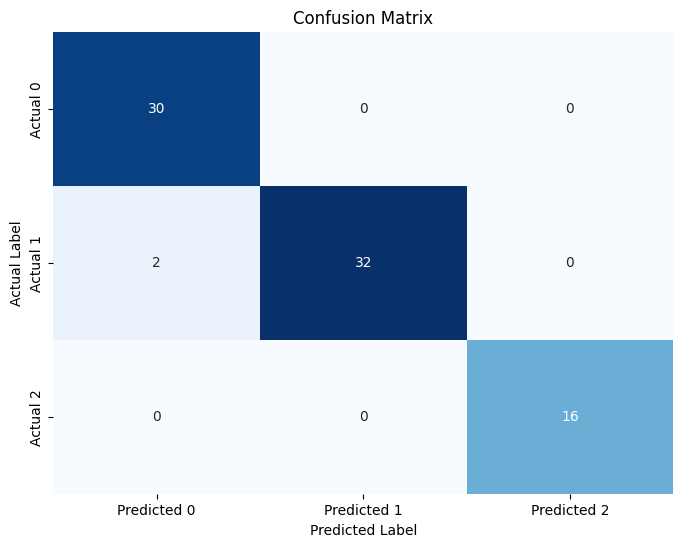

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1','Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1','Actual 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

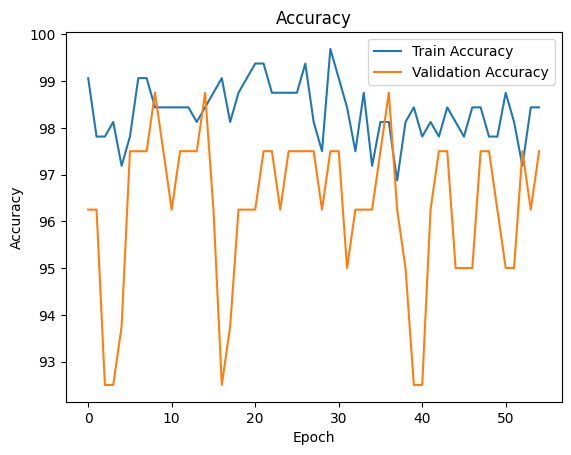

In [68]:
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()